In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.

In [2]:
data=pd.read_csv(r'C:\Users\satyam\Desktop\phase-3-data\phase-3-1\raw.githubusercontent.com_dsrscientist_dataset1_master_census_income.csv')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.shape

(32560, 15)

In [4]:
data.isna().sum()  #checking null values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
data['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
#separting numerical and categorical values
# for categorical
categorical=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical.append(i)
print('categorical=',categorical)
print('\n')
# for numerical
numerical=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical.append(i)
print('numerical=',numerical)


categorical= ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


numerical= ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


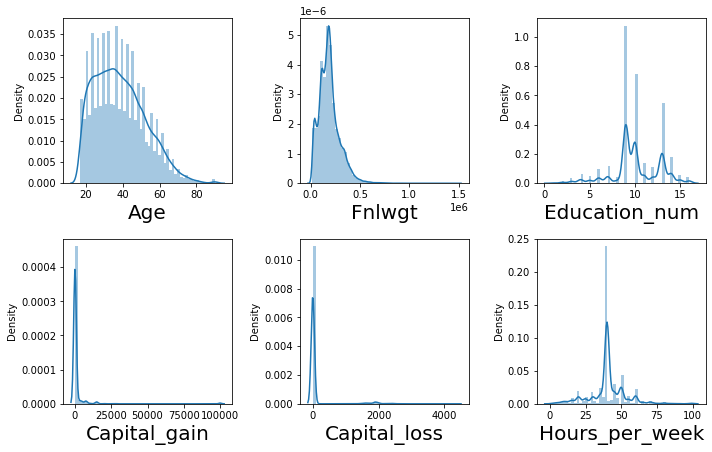

In [9]:
#cheking ditribution of plot
plt.figure(figsize=(10,15),facecolor='w')
plotnumber=1
for column in numerical:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    

# removing outliers with stsandarization method
1
# fixing outlier with z score

In [10]:
# fixing outlier with z score
from scipy.stats import zscore
z_score=zscore(data[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']])
abs_z_score=np.abs(z_score)
filtering_enter=(abs_z_score<3).all(axis=1)
data=data[filtering_enter]  # reasining filter data to main data
data.describe()


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000
mean,38.143729,185196.131626,10.077882,570.163443,1.209408,39.896101
std,13.357668,94546.412036,2.452841,2332.556812,32.712102,11.139681
min,17.000000,12285.000000,3.000000,0.000000,0.000000,4.000000
25%,27.000000,117517.500000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,177669.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,234281.500000,12.000000,0.000000,0.000000,45.000000
max,79.000000,506329.000000,16.000000,22040.000000,1258.000000,77.000000


In [11]:
data['Income'] =data['Income'].replace ({'<=50K':0,'>50K':1})

# Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [13]:
for i in (categorical):
    if data.dtypes[i]=='object':
        data[i] = lab_enc.fit_transform(data[i])

# To find the relation between feature we use heat map¶

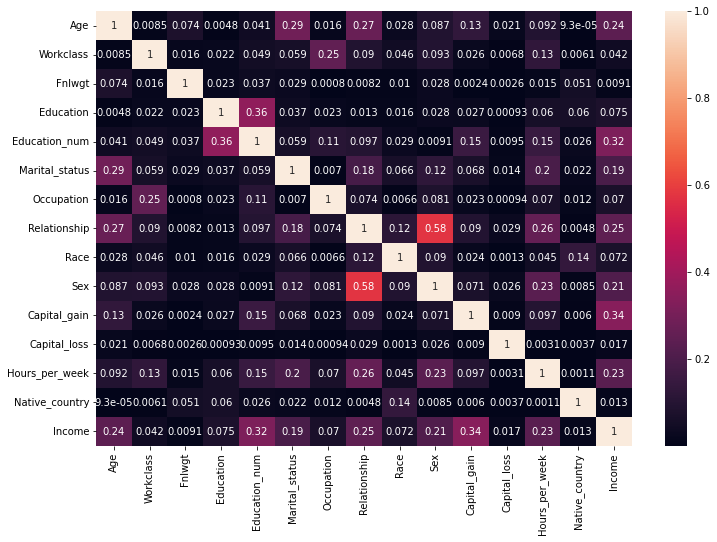

In [14]:
relation=data.corr().abs()  # cheking corelation between fetures vs feature and label
plt.figure(figsize=(12,8))
sns.heatmap(relation,annot=True)
plt.show()

In [16]:
# corelation with label
relation['Income'].sort_values(ascending=False) # cheking corelation

Income            1.000000
Capital_gain      0.342551
Education_num     0.318600
Relationship      0.245894
Age               0.239373
Hours_per_week    0.230620
Sex               0.209938
Marital_status    0.194458
Education         0.074586
Race              0.071742
Occupation        0.069874
Workclass         0.042127
Capital_loss      0.016596
Native_country    0.012994
Fnlwgt            0.009076
Name: Income, dtype: float64

In [17]:
#seprating features and label
x=data.drop(columns=['Income'])
y=data['Income']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=51)

In [19]:
random_clf=RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

# I selected RandomForestClassifier() because it clasification data

In [20]:
##write one funtion and call as many as time to check accuracy score of different model
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\n========== Train Result========')
        print(f'Accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train==False:
    
        pred=clf.predict(x_test)
        
        print('\n========== Test Result========')
        print(f'Accuracy score: {accuracy_score(y_test,pred)*100:.2f}%')

        print('\n\n Test classification Report\n',classification_report(y_test,pred,digits=2))

In [21]:
metric_score(random_clf,x_train,x_test,y_train,y_test, train=True) #train
metric_score(random_clf,x_train,x_test,y_train,y_test, train=False)#test


========== Train Result========
Accuracy score: 99.99%

========== Test Result========
Accuracy score: 85.95%


 Test classification Report
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      6991
           1       0.72      0.58      0.65      1958

    accuracy                           0.86      8949
   macro avg       0.81      0.76      0.78      8949
weighted avg       0.85      0.86      0.85      8949



# lets tune parameter useing gridsearch cv

In [22]:
#randomclassifier
params={
    'n_estimators':[11,14],
    'criterion':['gini','entropy'],
    'max_depth':[11,16],
    'min_samples_split':[12,11],
    'min_samples_leaf':[5,7]
    }
grid=GridSearchCV(random_clf,param_grid=params)
grid.fit(x_train,y_train)
print('best param=',grid.best_params_)

best param= {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 7, 'min_samples_split': 11, 'n_estimators': 11}


In [23]:
random_clf=grid.best_estimator_        # 2nd way to ('criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 13)
random_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=7,
                       min_samples_split=11, n_estimators=11)

In [24]:
metric_score(random_clf,x_train,x_test,y_train,y_test, train=True) #train
metric_score(random_clf,x_train,x_test,y_train,y_test, train=False)#test


========== Train Result========
Accuracy score: 87.73%

========== Test Result========
Accuracy score: 86.38%


 Test classification Report
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      6991
           1       0.75      0.56      0.64      1958

    accuracy                           0.86      8949
   macro avg       0.82      0.76      0.78      8949
weighted avg       0.86      0.86      0.86      8949



# here some accuracy increased but trainning score increased but accuracy is good
we can increased trainning score by alter some hyper tunning